### 1)Build UPGMA and NJ trees for this alignment, add both trees to the report. 
#we will use the alignment obtained using prank taking into account codons

#notes to understand subject


All algorithms are designed as worker subclasses of a base class TreeConstructor.
All constructors have the same method build_tree that accept a MultipleSeqAlignment object 
to construct the tree. Currently there are two types of tree constructors: 
DistanceTreeConstructor and ParsimonyTreeConstructor.'''

In [3]:

from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO
aln = AlignIO.read('/home/sedreh/ITMO/semester3/Molecular_phylogenetic/homework_4/data/SUP35_aln.best.fas', 'fasta')
print (aln)

SingleLetterAlphabet() alignment with 10 rows and 2460 columns
ATGTCA------------------------------GACCAA--...AAT SUP35_Kla_AB039749
ATGTCGGAGGAAGATCAAATTCAATCGCAAGGCAACGACCAAGG...--- SUP35_Agos_ATCC_10895_NM_211584
ATGTCG------------------------------GAT-----...--- SUP35_Scer_74-D694_GCA_001578265.1
ATGTCG------------------------------GAT-----...--- SUP35_Sbou_unique28_CM003560
ATGTCG------------------------------GAT-----...--- SUP35_Scer_beer078_CM005938
ATGTCG------------------------------GAT-----...--- SUP35_Spar_A12_Liti
ATGTCT------------------------------GAT-----...--- SUP35_Smik_IFO1815T_30
ATGTCT------------------------------GAT-----...--- SUP35_Sarb_H-6_chrXIII_CM001575
ATGTCA------------------------------GAT-----...--- SUP35_Skud_IFO1802T_36
ATGTCT------------------------------GAT-----...--- SUP35_Seub_CBS12357_chr_II_IV_DF968535


#DistanceTreeConstructor:
The DistanceTreeConstructor has two algorithms: 
UPGMA (Unweighted Pair Group Method with Arithmetic Mean) and NJ (Neighbor Joining).
Both algorithms construct trees based on a distance matrix! 

"identity" is the name of the model (scoring matrix) to calculate the distance

In [4]:

calculator = DistanceCalculator('identity')
dm = calculator.get_distance(aln)
print(dm)

SUP35_Kla_AB039749	0
SUP35_Agos_ATCC_10895_NM_211584	0.3825203252032521	0
SUP35_Scer_74-D694_GCA_001578265.1	0.3674796747967479	0.39634146341463417	0
SUP35_Sbou_unique28_CM003560	0.3670731707317073	0.39593495934959344	0.0008130081300813385	0
SUP35_Scer_beer078_CM005938	0.37073170731707317	0.40975609756097564	0.025203252032520274	0.025203252032520274	0
SUP35_Spar_A12_Liti	0.36056910569105693	0.3898373983739838	0.060975609756097615	0.060975609756097615	0.08333333333333337	0
SUP35_Smik_IFO1815T_30	0.3556910569105691	0.38699186991869916	0.10284552845528461	0.10284552845528461	0.12276422764227646	0.09024390243902436	0
SUP35_Sarb_H-6_chrXIII_CM001575	0.359349593495935	0.39593495934959344	0.12032520325203255	0.12032520325203255	0.14065040650406502	0.1077235772357723	0.11016260162601621	0
SUP35_Skud_IFO1802T_36	0.36626016260162597	0.3967479674796748	0.12479674796747964	0.12560975609756098	0.14349593495934965	0.11829268292682926	0.12276422764227646	0.11869918699186988	0
SUP35_Seub_CBS12357_chr_

In [5]:
#from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
#constructor = DistanceTreeConstructor(calculator, 'nj')
#tree = constructor.build_tree(aln)
#print(tree)

#use our own DistanceMatrix directly to build trees

In [6]:

from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
constructor = DistanceTreeConstructor()
tree_nj = constructor.nj(dm)
print(tree_nj)


Tree(rooted=False)
    Clade(branch_length=0, name='Inner8')
        Clade(branch_length=0.003163109756097557, name='Inner6')
            Clade(branch_length=0.06587059620596204, name='SUP35_Seub_CBS12357_chr_II_IV_DF968535')
            Clade(branch_length=0.12356029810298101, name='Inner1')
                Clade(branch_length=0.17411077235772357, name='SUP35_Kla_AB039749')
                Clade(branch_length=0.2084095528455285, name='SUP35_Agos_ATCC_10895_NM_211584')
        Clade(branch_length=0.002223069105691068, name='Inner7')
            Clade(branch_length=0.054026930894308905, name='SUP35_Sarb_H-6_chrXIII_CM001575')
            Clade(branch_length=0.00984502032520325, name='Inner5')
                Clade(branch_length=0.047522865853658544, name='SUP35_Smik_IFO1815T_30')
                Clade(branch_length=0.017924288617886155, name='Inner4')
                    Clade(branch_length=0.027865853658536582, name='SUP35_Spar_A12_Liti')
                    Clade(branch_length=0.03168

#write the tree  in xml file

In [4]:
from Bio import Phylo
Phylo.write([tree_nj], 'tree-nj.xml', 'phyloxml')

1

#draw the tree

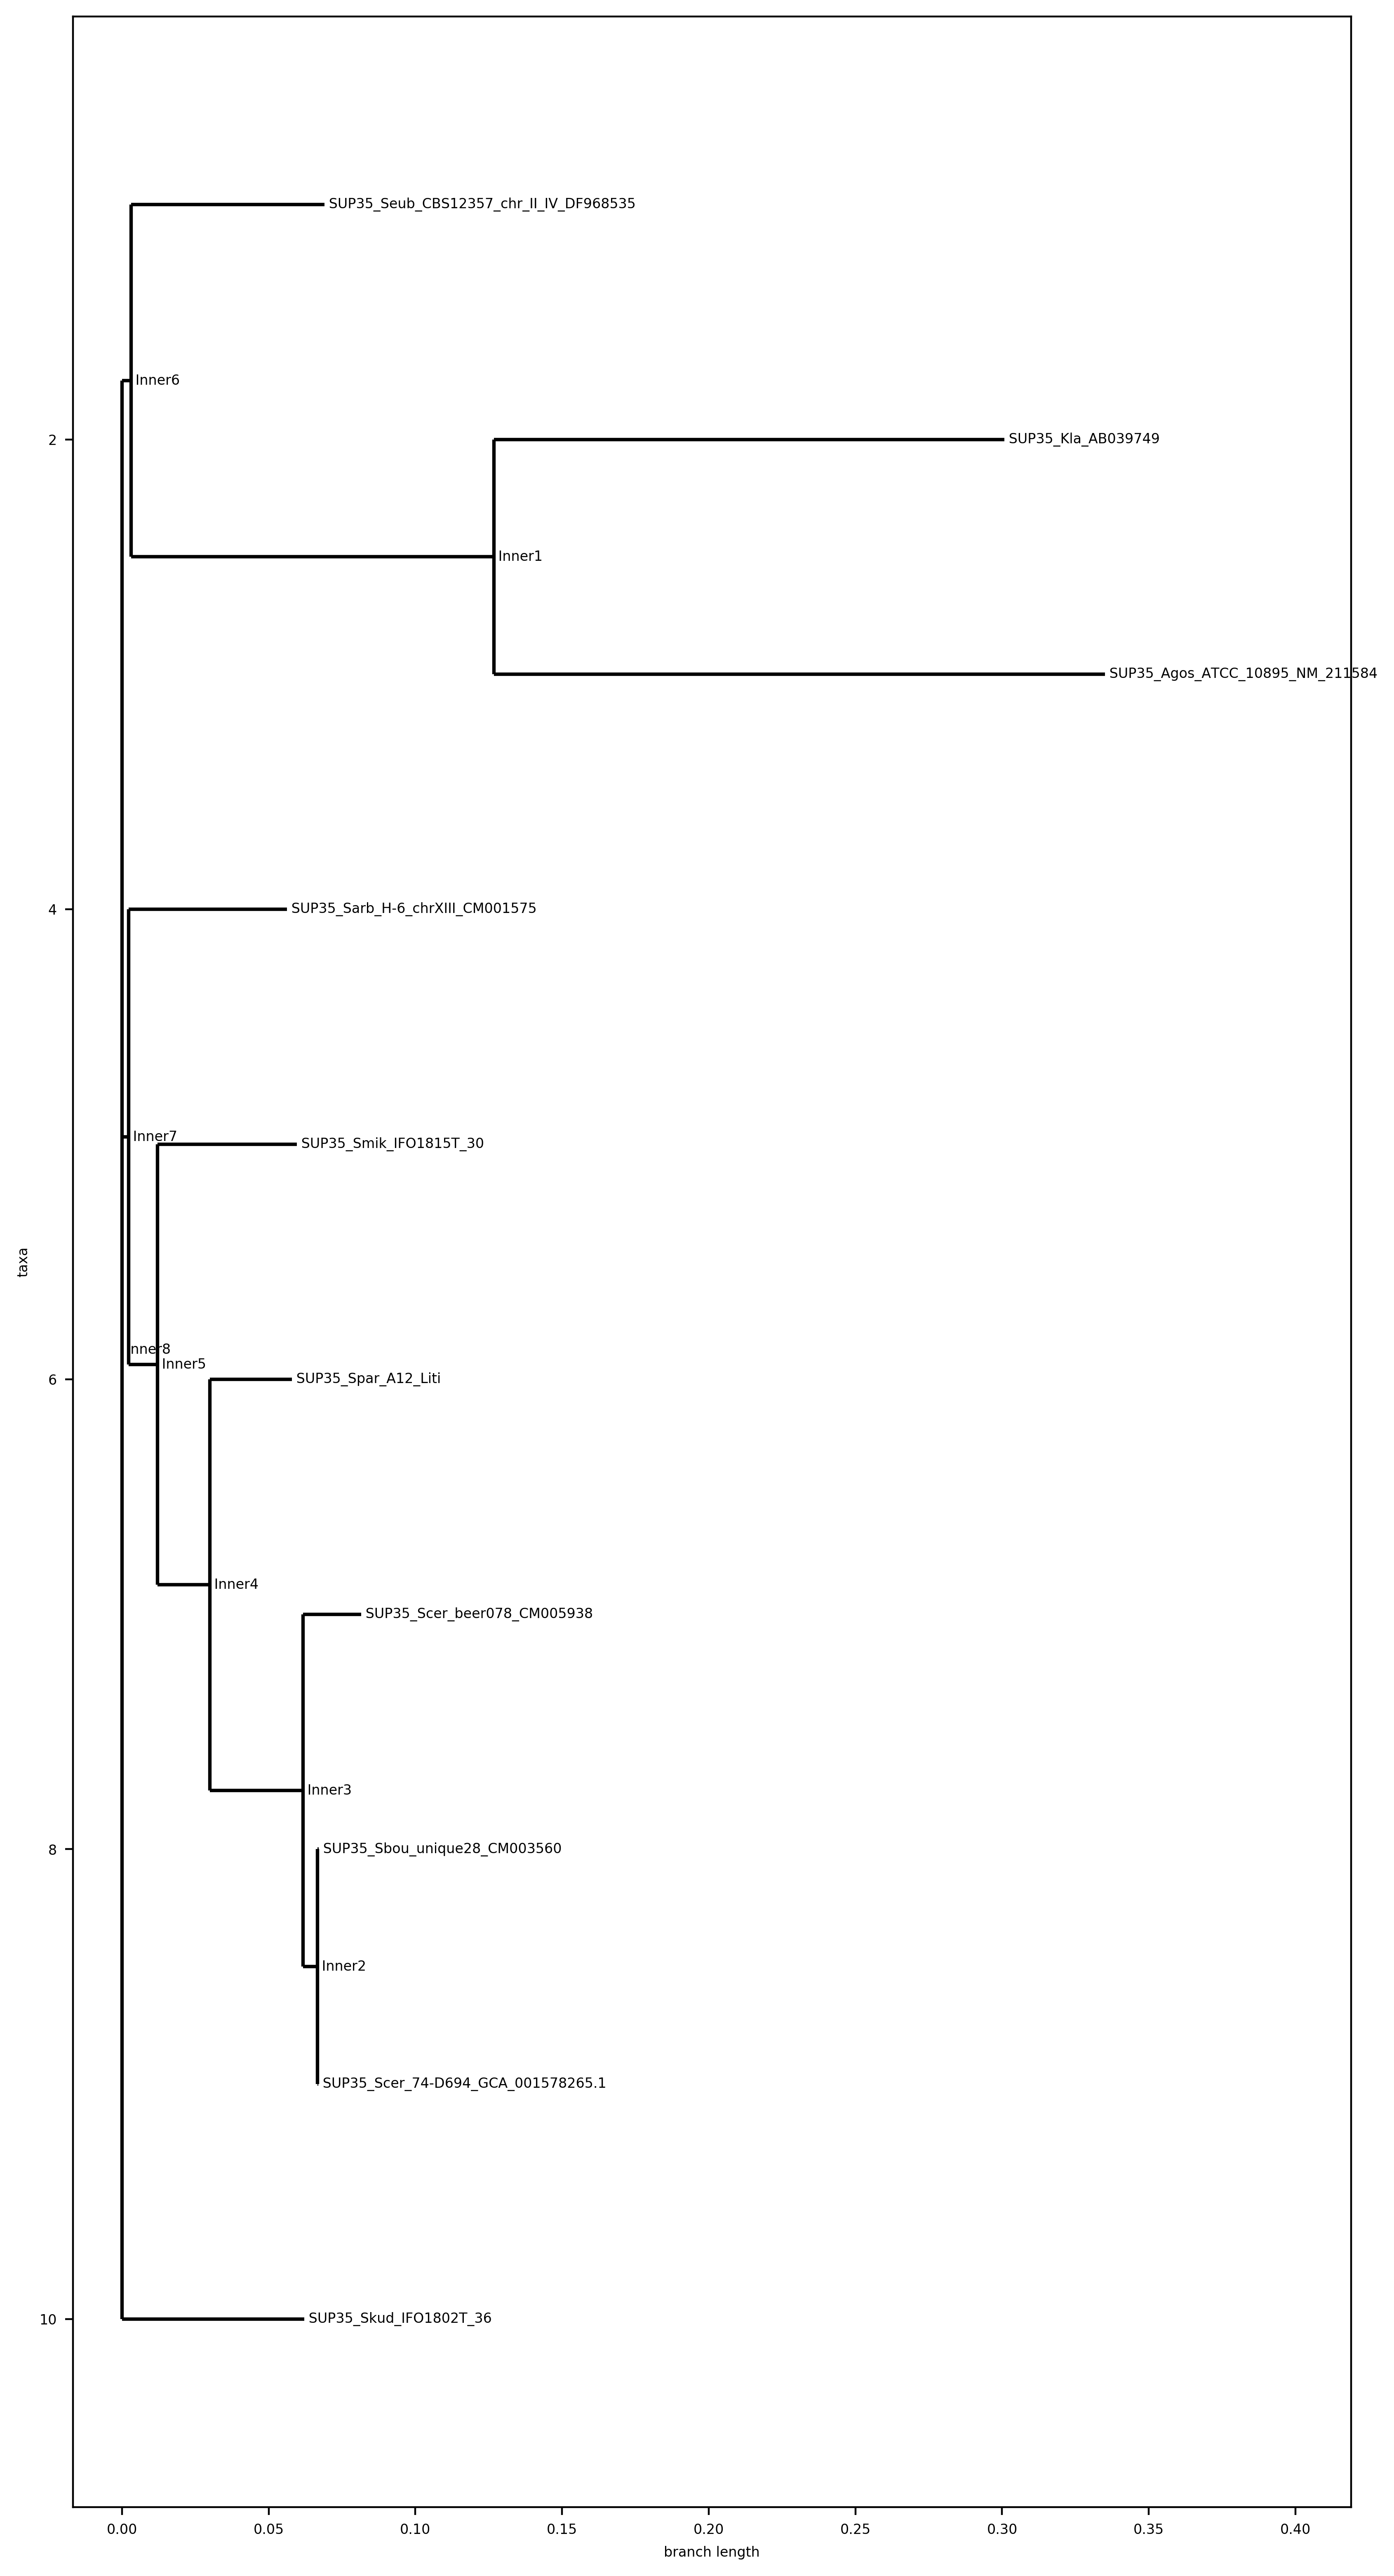

<Figure size 432x288 with 0 Axes>

In [9]:
from Bio import Phylo
import matplotlib
import matplotlib.pyplot as plt
import pylab

matplotlib.rc('font', size=6) # set the size of the figure
fig = plt.figure(figsize=(10, 20), dpi=400)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree_nj, axes=axes)
pylab.savefig('tree-nj.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.1)

In [7]:
tree_upgma = constructor.upgma(dm)
print(tree_upgma)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner9')
        Clade(branch_length=0.19575155614837397, name='SUP35_Agos_ATCC_10895_NM_211584')
        Clade(branch_length=0.01607199568089429, name='Inner8')
            Clade(branch_length=0.11493743648373986, name='Inner7')
                Clade(branch_length=0.06474212398373982, name='SUP35_Seub_CBS12357_chr_II_IV_DF968535')
                Clade(branch_length=0.003931656504065031, name='Inner6')
                    Clade(branch_length=0.06081046747967479, name='SUP35_Skud_IFO1802T_36')
                    Clade(branch_length=0.003493394308943104, name='Inner5')
                        Clade(branch_length=0.05731707317073169, name='SUP35_Sarb_H-6_chrXIII_CM001575')
                        Clade(branch_length=0.006554878048780466, name='Inner4')
                            Clade(branch_length=0.05076219512195122, name='SUP35_Smik_IFO1815T_30')
                            Clade(branch_length=0.014684959349593477, name='Inner3')
  

In [8]:
Phylo.write([tree_upgma], 'tree-upgma.xml', 'phyloxml')

1

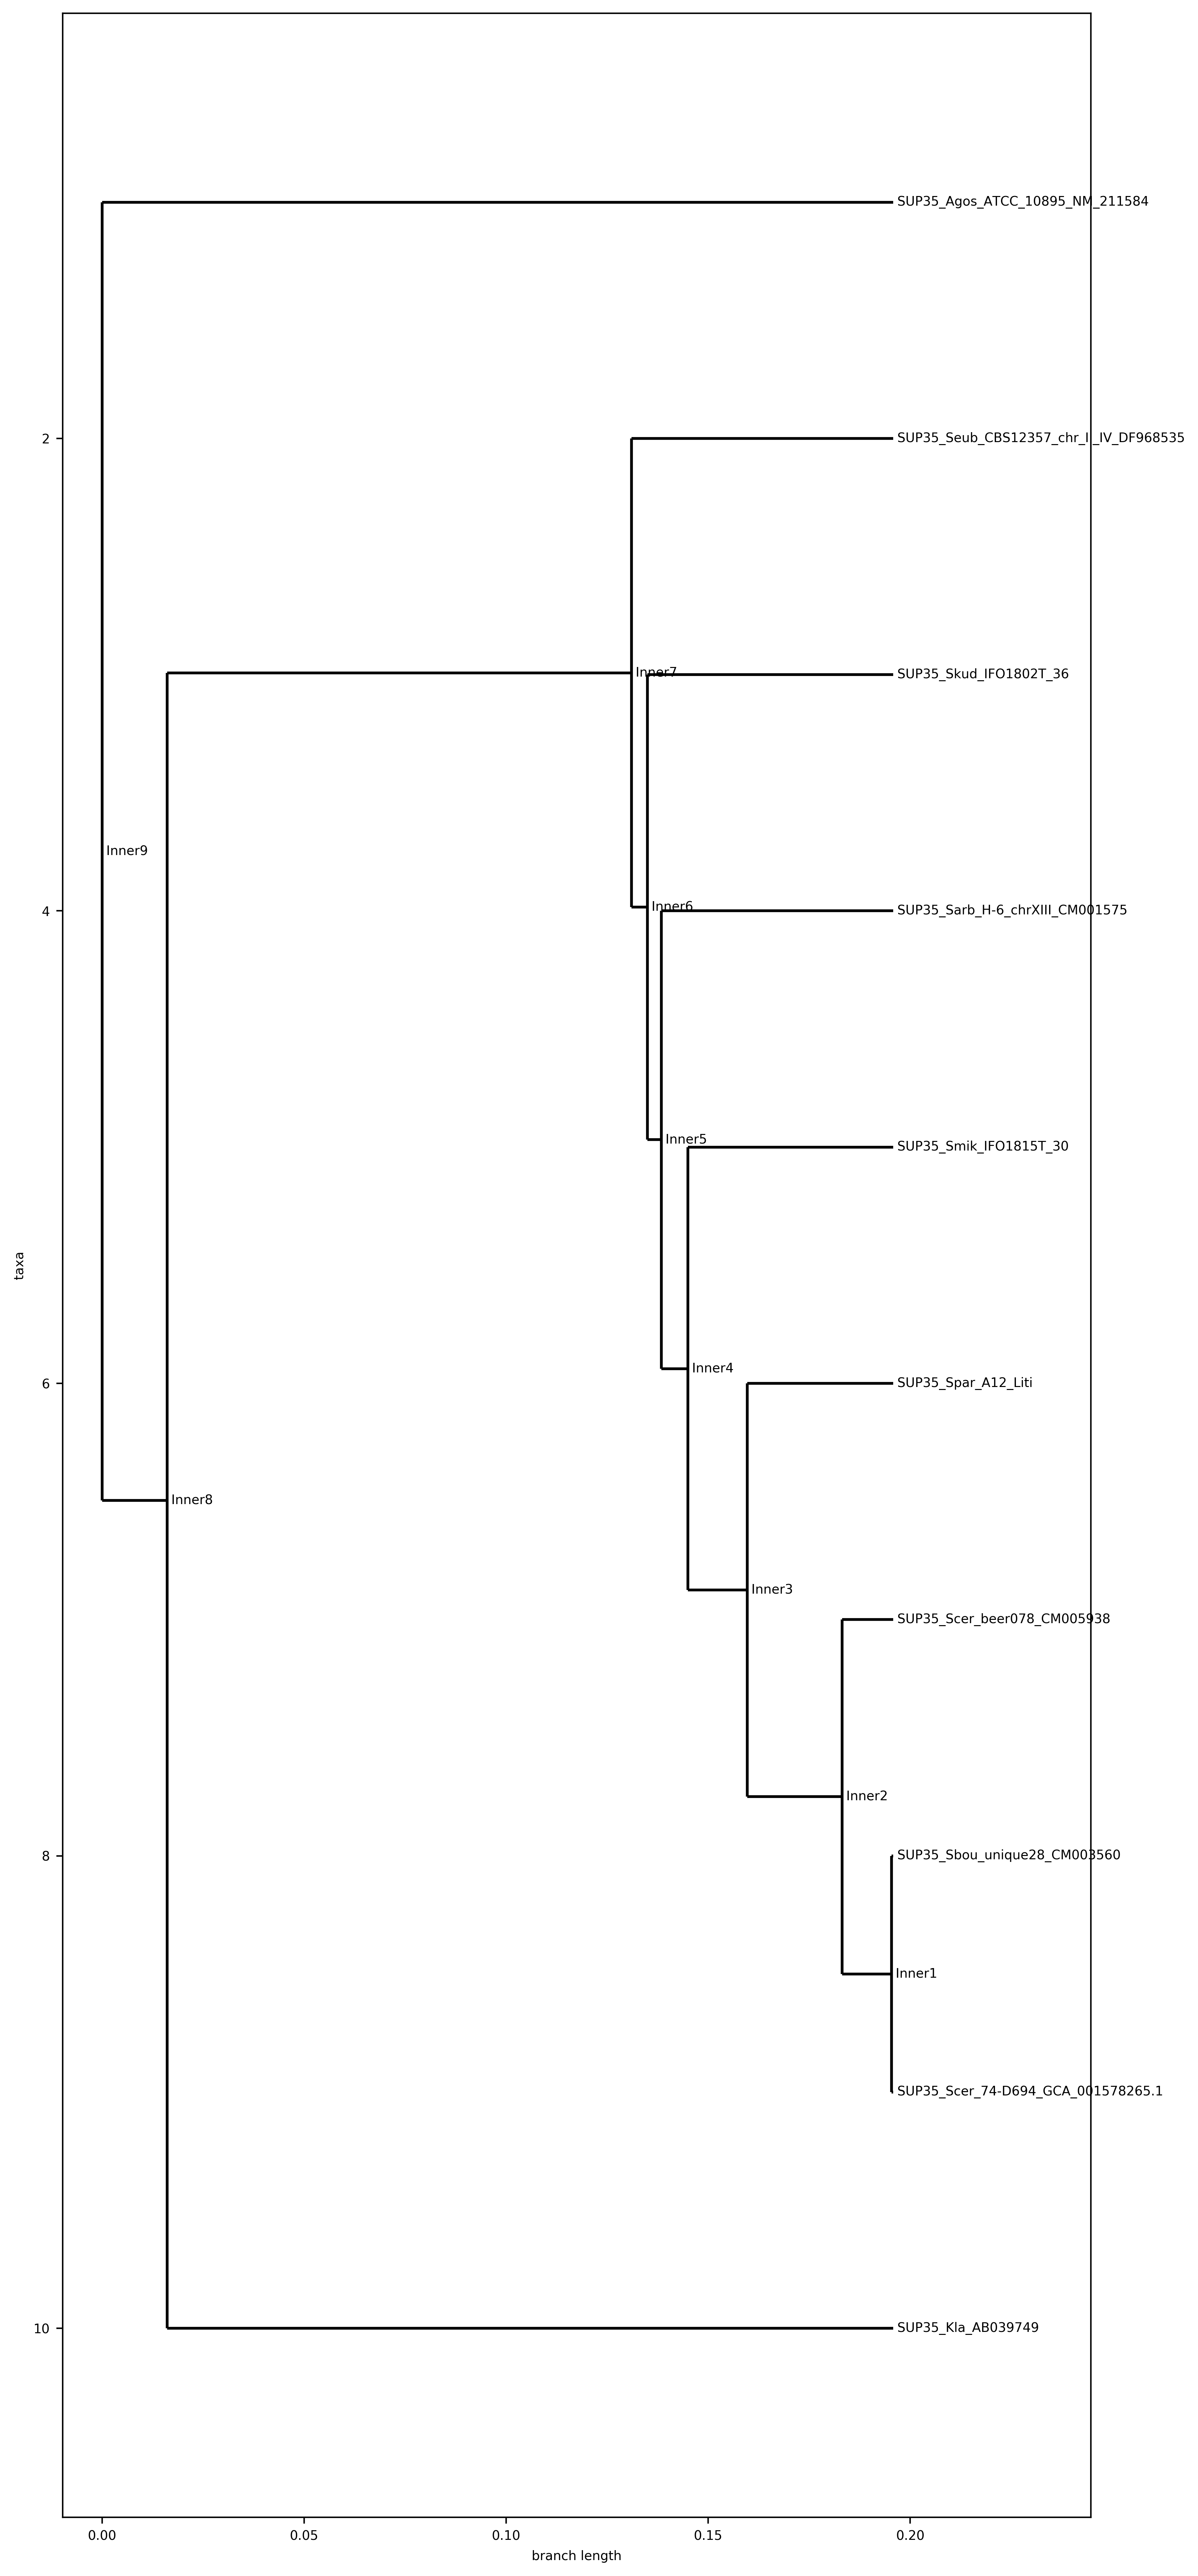

<Figure size 432x288 with 0 Axes>

In [9]:
matplotlib.rc('font', size=7) # set the size of the figure
fig = plt.figure(figsize=(10, 25), dpi=400)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree_upgma, axes=axes)
pylab.savefig('tree_upgma.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=True, bbox_inches='tight', pad_inches=0.1)

#### some explanation to understand UPGMA and NJ trees.

#The most important practical issues: UPGMA provides rooted tree as a result, while NJ unrooted, and we have to take care proper rooting the NJ tree afterward.
Bootstrapping is a re-sampling method used in phylogenetics to estimate the reliability (or by other opinions the peroduceability) of individual branching points of a tree:
As a first approach, bootstrap values tell how much you can "trust" a branch on a phylogenetic tree. The bigger the better. Values over 0.9 (90%) are usually OK. (But that depends on your data and research question too.) Values below 0.6 (60%) are usually no-go.
If data is sparse or very noisy, bootstrap values will be low.

simplely different:


UPGMA: equal rate among branches >> equal depth from root (assumes the same evolutionary speed for all lineages. all leaves have the same distance from the root (creates ultrametric tree)). Ultrametricityis satisfied when two of the three distances under consideration are equal and as large (or larger) as the third one. Ultrametric trees are rooted trees in which all the end nodes are equidistant from the root of the tree, which is only possible by assuming a molecular clock.


NJ: allow different rate among branches >> different depth from root (taking the two closest nodes of the tree and defines them as neighbors; keep doing this until all of the nodes have been paired together)

similar :
both distance based method


### 2)Do they support the choice of Agos + Kla as an external group? 

outgroup: a sequence for which it is "known" that all the other sequences are more closely related among themselves than to the outgroup. Then, we know that the ancestral sequence lies on the evolutionary path between the outgroup and all the other sequences.

One of the rooting technique consists of including an outgroup in the data set and placing the root at the midpoint of the branch that connects the outgroup with the rest (ingroup) of the taxa.

Because the polarity (direction) of character change can be determined only on a rooted phylogeny, the choice of outgroup is essential for understanding the evolution of traits along a phylogeny

so, as we can see in both trees, in UPGME, outgroups are kla and Agos but NJ tree shows skud as an ogroup!

### 3) Model selection: To select appropriate model for our data, we can use jmodeltest (https://github.com/ddarriba/jmodeltest2, web interface is down right now), or ModelFinder (part of IQ-Tree, http://iqtree.cibiv.univie.ac.at/ , choose “Model selection” tab). Which model works best for the data?



I used jmodeltest and Found Best-fit model: TIM3+F+I+G4.
For IQ-Tree is also the same!




###### PartitionFinder2 is a program for selecting best-fit partitioning schemes and models of evolution for nucleotide, amino acid, and morphology alignments. 




### 4.1  Prepare the alignment for analysis in PartitionFinder

I did it using GeneiousPrime
https://www.geneious.com/academic/resources/download/


sudo sh ./Geneious Prime linux64 2019 0 2 with jre.sh

### 4.2 Based on a configuration file template in the folder with the lesson materials, create a configuration file that forces PartitionFinder to analyze the entire sequence as a whole.

Based on the manuall I uncommented following parts:

alignment = "SUP35_aln.best.phy"
    
branchlengths = linked;

models = all;

model_selection = bic;

#SCHEME 1
Gene = 1-2460


#### Does the suggested model remains the same? 

After running in the folder of analysis I found best_scheme file that explain about best model! 
As I understand I have GTR+I+G as a best model:



 in number 3 the best model was TIM3+F+I+G4! so it changed!

### 4.3 Based on the same template, create a configuration file that compares four partition schemes: 			
the entire sequence (without partition);

two separate (consecutive) domains;

each of the three positions of the codons individually for the entire sequence;

each of the three codon positions individually in two separate domains. 

Run the PartitionFinder with this configuration file (this is one run, not 4) on the same alignment. Which data partitioning scheme is the best?
